### Visualize volcano plot for each cell type

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
p_values_table = read.csv("fetalization_results/fetalization_p_values.csv")

In [4]:
cell_types <- c("Cardiomyocyte", "Endothelial", "Epicardial",
             "Fibroblast", "LEC", "Lymphoid", "Myeloid", "Neuronal", "Pericyte", "vSMC")

In [5]:
plots_dir <- "fetalization_plots/"
dir.create(plots_dir)

Warning message in dir.create(plots_dir):
“'fetalization_plots' already exists”


#### Iterate through all cell types

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”


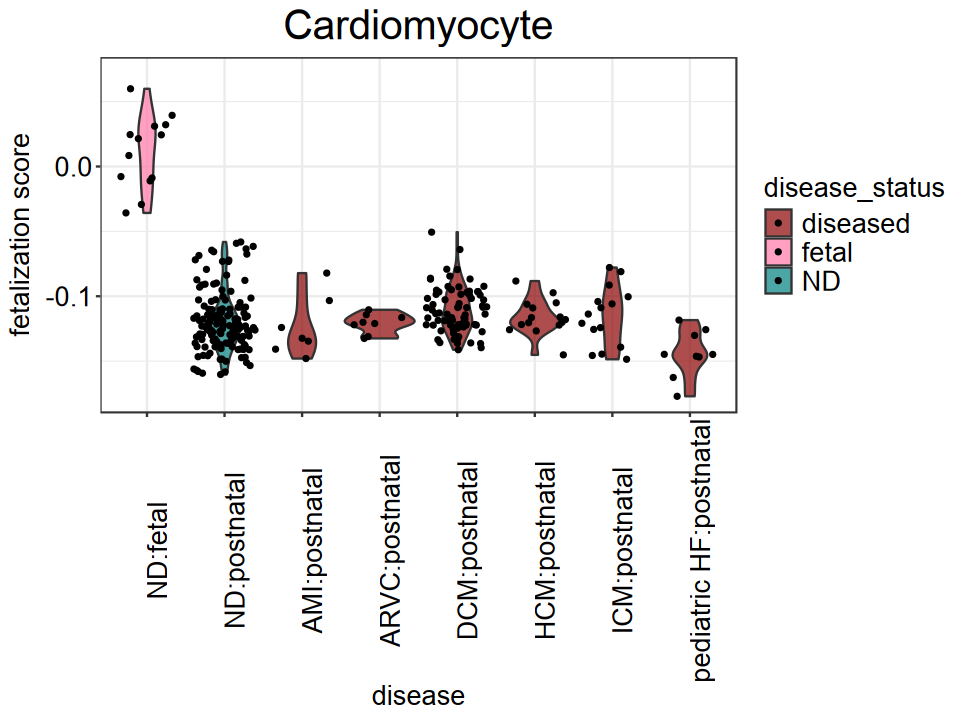

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”


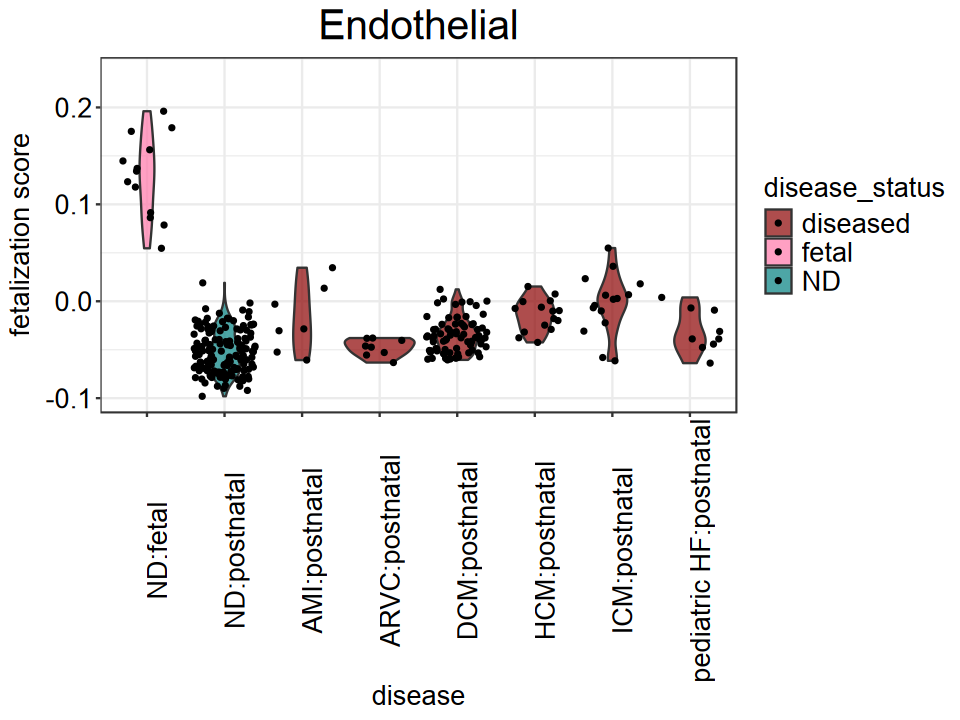

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”


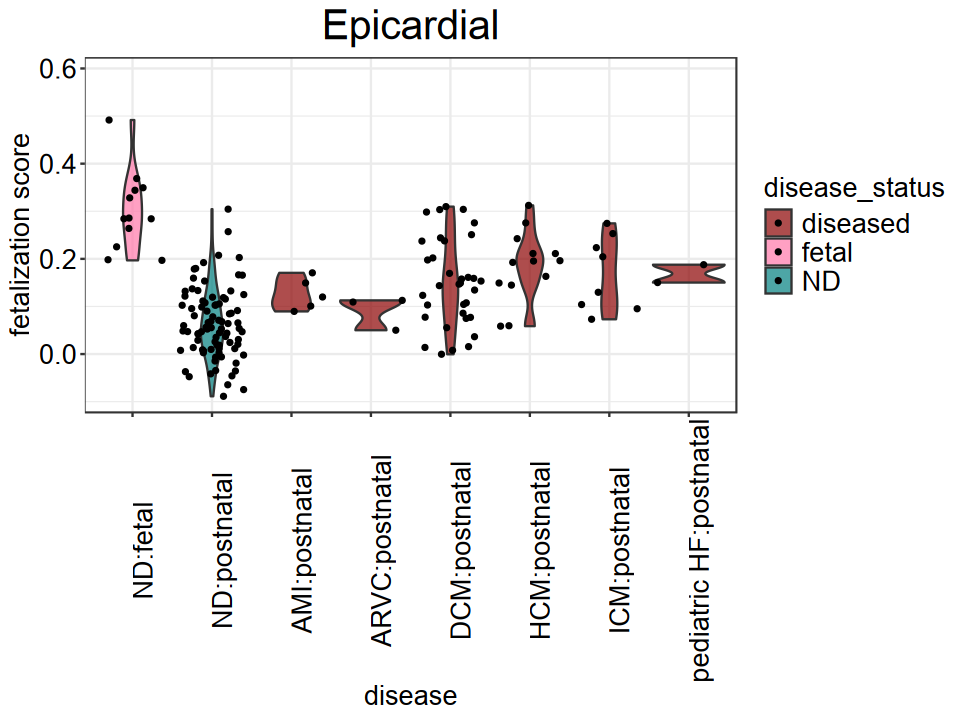

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”


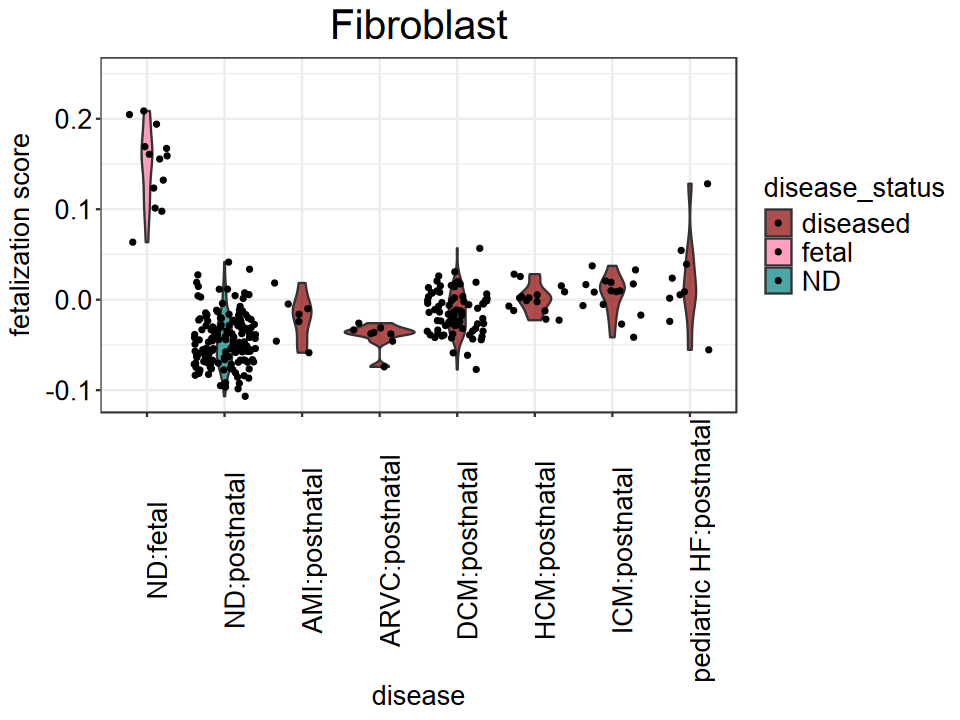

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”


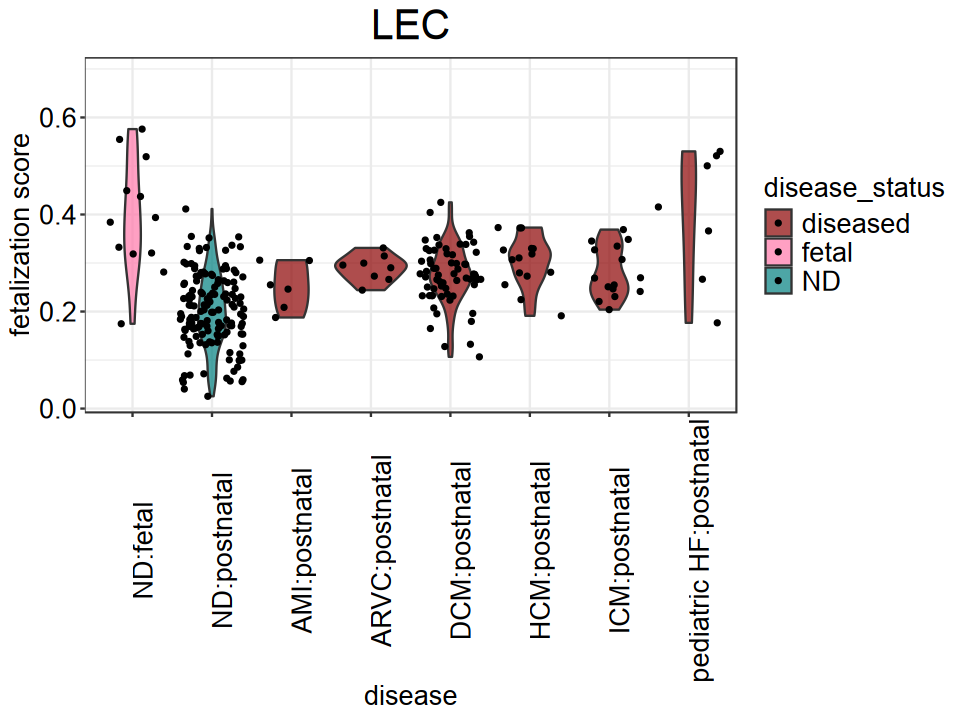

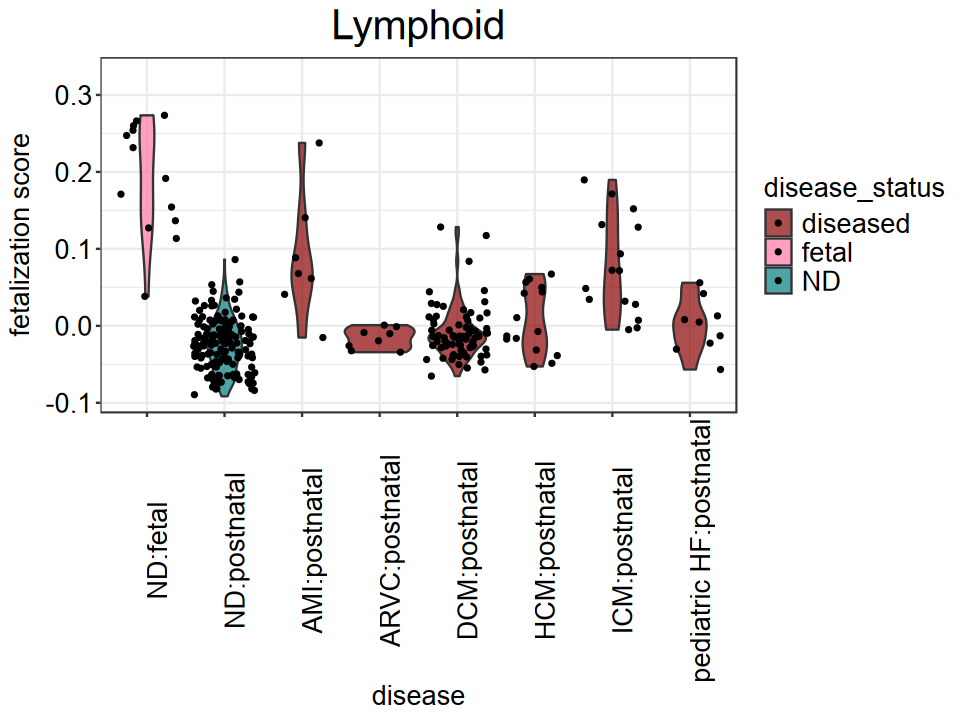

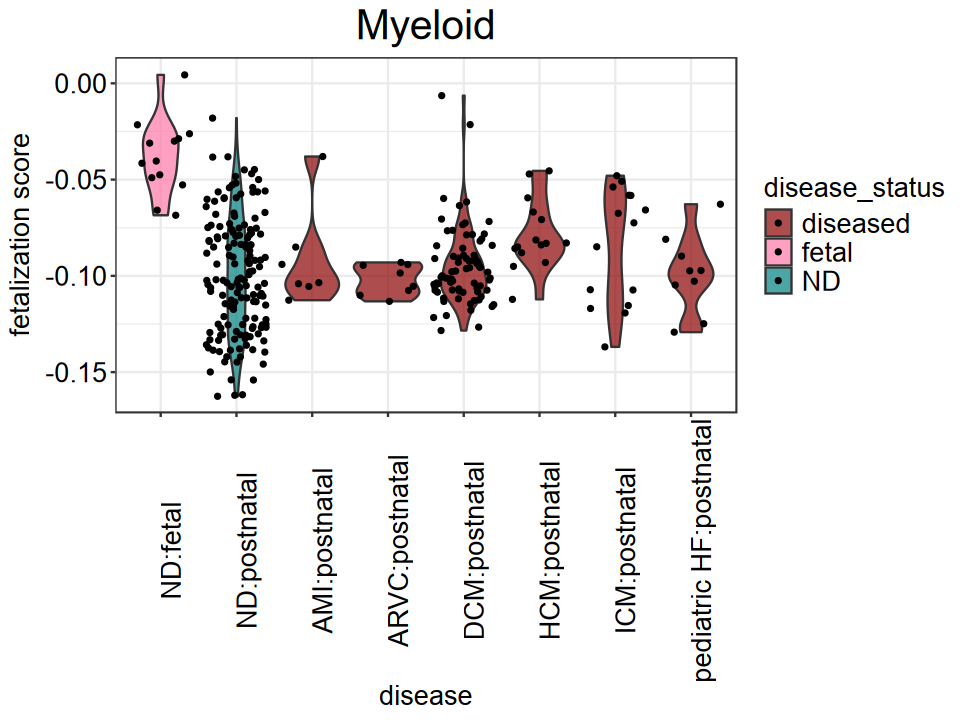

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”


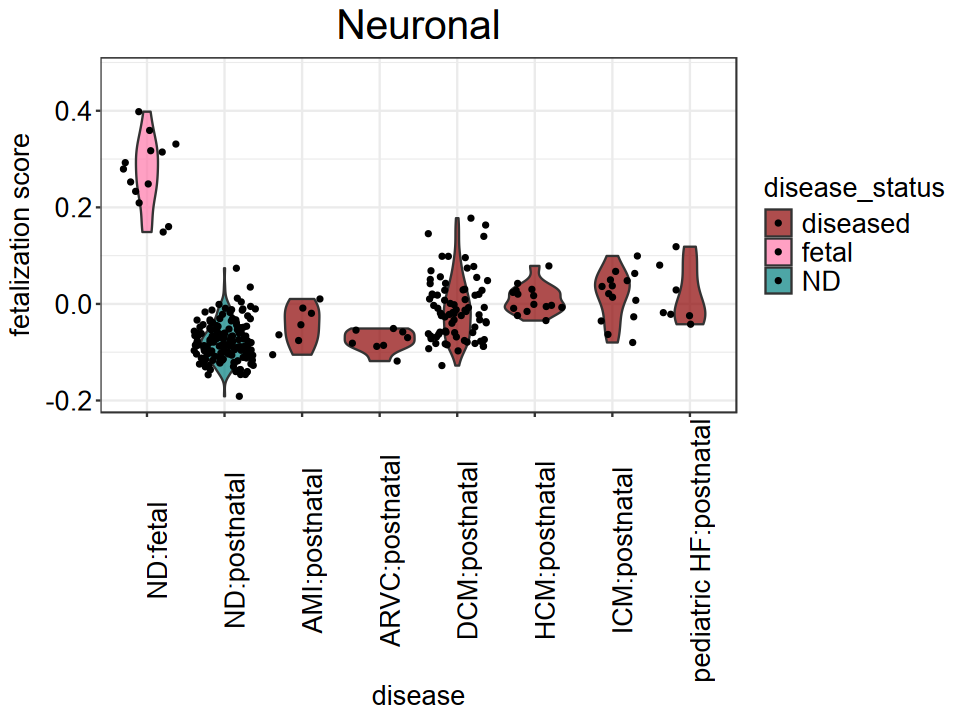

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”


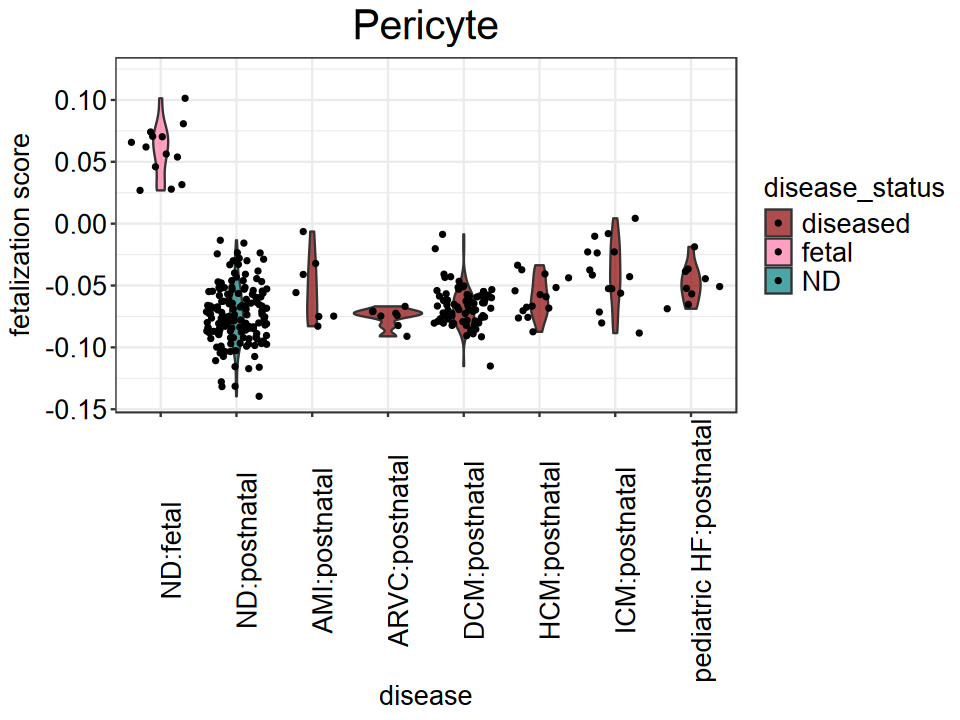

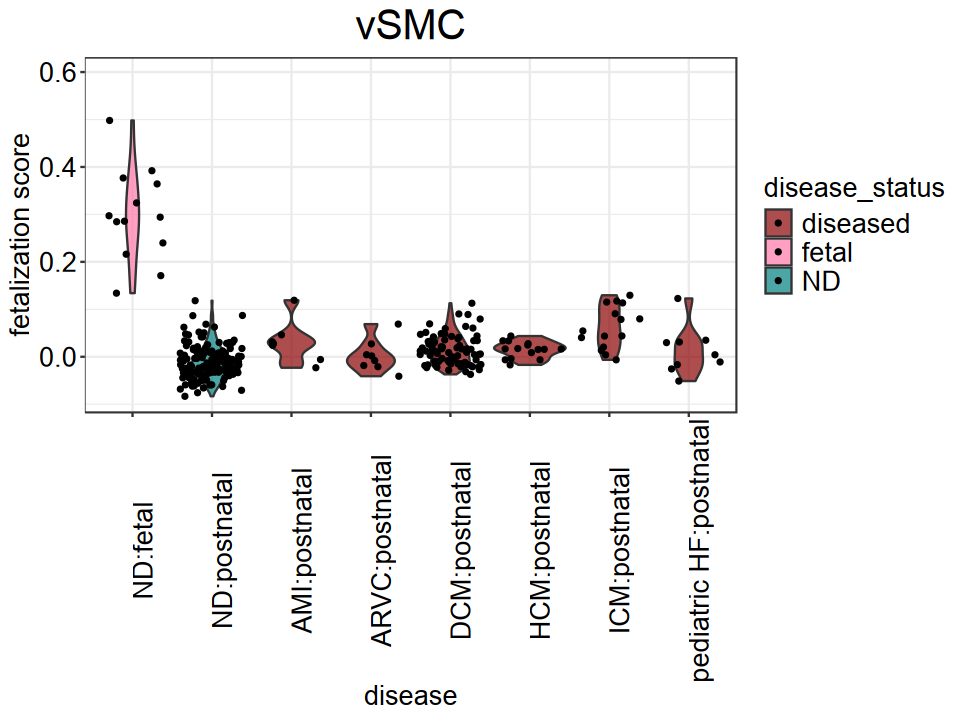

In [6]:
options(repr.plot.width = 8, repr.plot.height = 6)

for (cell_type in cell_types) {
    fetalization_values_df = read.csv(paste0("fetalization_results/", cell_type, "_fetalization_scores.csv"))

    # add disease status (fetal, ND, diseased)
    fetalization_values_df <- fetalization_values_df %>%
      mutate(disease_status = case_when(
        age_disease_status == "ND:postnatal" ~ "ND",
        age_disease_status == "ND:fetal" ~ "fetal",
        TRUE ~ "diseased"
      ))

    # get min and max value 
    min_value <- min(fetalization_values_df$fetalization)
    max_value <- max(fetalization_values_df$fetalization)
    
    # specify order
    fetalization_values_df$age_disease_status <- factor(fetalization_values_df$age_disease_status, 
                                                    c('ND:fetal', 'ND:postnatal', 'AMI:postnatal', 'ARVC:postnatal', 'DCM:postnatal', 
                                                      'HCM:postnatal', 'ICM:postnatal', 'pediatric HF:postnatal'))

    # produce plot
    p1 <- ggplot(data = fetalization_values_df, mapping = aes(x = age_disease_status, y = fetalization, fill = disease_status)) + 
    geom_violin(alpha = 0.7) + ylim(min_value, max_value * 1.2) +
    geom_jitter(size = 1) + theme_bw() +
    theme(legend.text = element_text(size = 16, color = "black"), 
         legend.title = element_text(size = 16, color = "black"), 
         plot.title = element_text(size = 24, hjust = 0.5, color = "black"), 
         axis.title.x = element_text(size = 16, color = "black"),
         axis.title.y = element_text(size = 16, color = "black"),
         axis.text.x = element_text(size = 16, angle = 90, color = "black"),
         axis.text.y = element_text(size = 16, color = "black"),
	 strip.text = element_text(size = 18)) + scale_fill_manual(values = c("diseased" = "#8B0000", 
                                                                         "ND" = "#008080",
                                                                         "fetal" = "#FF77A9")) + 
    labs(x = "disease", y = "fetalization score", title = cell_type)
    print(p1)

    ggsave(p1, filename = paste0(plots_dir, cell_type, "_fetalization_scores.pdf"), height = 6, width = 8)
}

#### Increase y-axis limit for lymphoid and myeloid cell plots

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”


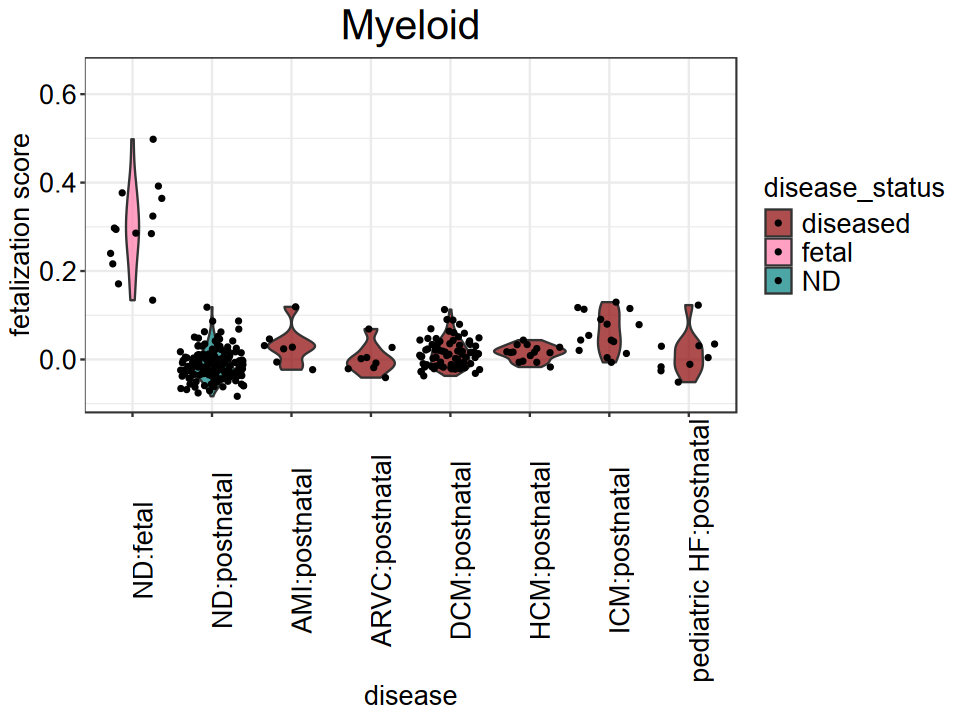

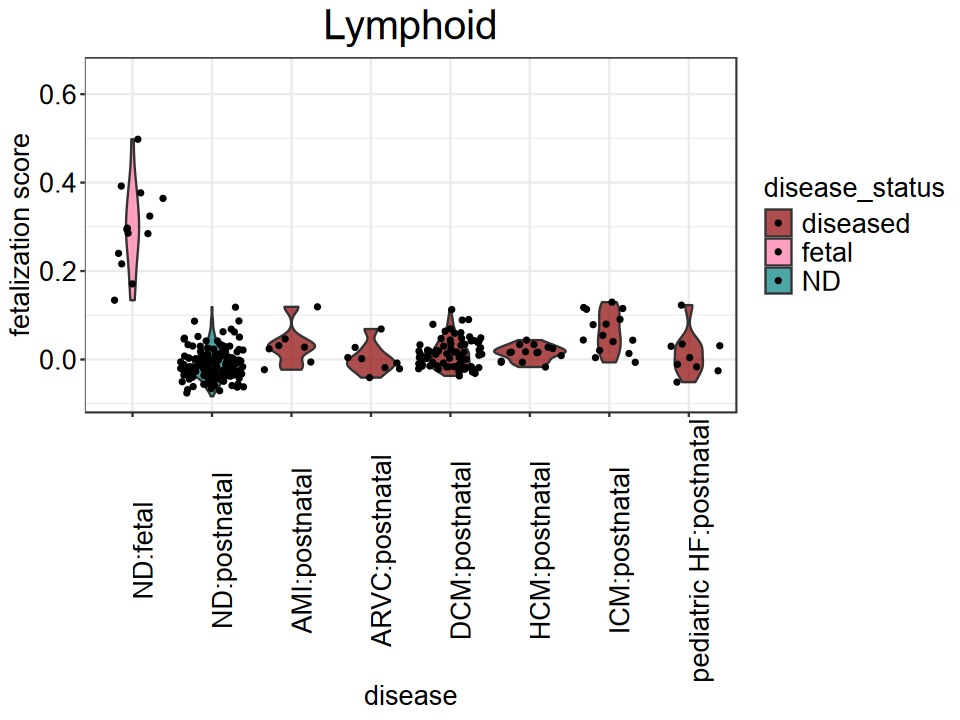

In [16]:
redo_cell_type <- c("Myeloid", "Lymphoid")

for (cell_type in redo_cell_type) {
    sfetalization_values_df = read.csv(paste0("fetalization_results/", cell_type, "_fetalization_scores.csv"))

    # add disease status (fetal, ND, diseased)
    fetalization_values_df <- fetalization_values_df %>%
      mutate(disease_status = case_when(
        age_disease_status == "ND:postnatal" ~ "ND",
        age_disease_status == "ND:fetal" ~ "fetal",
        TRUE ~ "diseased"
      ))

    # get min and max value 
    min_value <- min(fetalization_values_df$fetalization)
    max_value <- max(fetalization_values_df$fetalization)
    
    # specify order
    fetalization_values_df$age_disease_status <- factor(fetalization_values_df$age_disease_status, 
                                                    c('ND:fetal', 'ND:postnatal', 'AMI:postnatal', 'ARVC:postnatal', 'DCM:postnatal', 
                                                      'HCM:postnatal', 'ICM:postnatal', 'pediatric HF:postnatal'))

    # produce plot
    p1 <- ggplot(data = fetalization_values_df, mapping = aes(x = age_disease_status, y = fetalization, fill = disease_status)) + 
    geom_violin(alpha = 0.7) + ylim(min_value, max_value * 1.3) +
    geom_jitter(size = 1) + theme_bw() +
    theme(legend.text = element_text(size = 16, color = "black"), 
         legend.title = element_text(size = 16, color = "black"), 
         plot.title = element_text(size = 24, hjust = 0.5, color = "black"), 
         axis.title.x = element_text(size = 16, color = "black"),
         axis.title.y = element_text(size = 16, color = "black"),
         axis.text.x = element_text(size = 16, angle = 90, color = "black"),
         axis.text.y = element_text(size = 16, color = "black"),
	 strip.text = element_text(size = 18)) + scale_fill_manual(values = c("diseased" = "#8B0000", 
                                                                         "ND" = "#008080",
                                                                         "fetal" = "#FF77A9")) + 
    labs(x = "disease", y = "fetalization score", title = cell_type)
    print(p1)

    ggsave(p1, filename = paste0(plots_dir, cell_type, "_fetalization_scores.pdf"), height = 6, width = 8)
}

In [13]:
for (cell_type_val in cell_types) {
    cell_type_significant_p <- p_values_table[(p_values_table$cell_type == cell_type_val) & (p_values_table$p_value < 0.05), ]
    print(cell_type_significant_p)
    flush.console()
}

  X     age_disease_status statistic      p_value     cell_type
1 0          DCM:postnatal      4164 2.896497e-04 Cardiomyocyte
3 2               ND:fetal         0 2.308005e-09 Cardiomyocyte
4 3 pediatric HF:postnatal      1113 1.933621e-03 Cardiomyocyte
    X     age_disease_status statistic      p_value   cell_type
8   7          DCM:postnatal      3342 6.590739e-08 Endothelial
9   8          HCM:postnatal       216 2.126398e-07 Endothelial
10  9               ND:fetal         0 2.284813e-09 Endothelial
11 10 pediatric HF:postnatal       343 1.110369e-02 Endothelial
12 11          AMI:postnatal       235 9.623555e-03 Endothelial
13 12          ICM:postnatal       243 4.687515e-07 Endothelial
    X     age_disease_status statistic      p_value  cell_type
15 14          DCM:postnatal       699 6.957656e-06 Epicardial
16 15          HCM:postnatal       132 9.080193e-06 Epicardial
17 16               ND:fetal        14 5.299091e-08 Epicardial
18 17 pediatric HF:postnatal        16 4.136